In [2]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import folium as fl

In [3]:
india=pd.read_csv("india_places.csv")

In [4]:
india.info()
india.head()
india.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1297 entries, 0 to 1296
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   State           1297 non-null   object 
 1   District        1297 non-null   object 
 2   City            1297 non-null   object 
 3   Population      1297 non-null   object 
 4   Area (in km^2)  1297 non-null   object 
 5   Latitude        1297 non-null   float64
 6   Longitude       1297 non-null   float64
dtypes: float64(2), object(5)
memory usage: 71.1+ KB


(1297, 7)

In [5]:
import numpy as np
india['Population'] = pd.to_numeric(india['Population'], errors='coerce')
india['Area (in km^2)'] = pd.to_numeric(india['Area (in km^2)'], errors='coerce')
india.drop_duplicates(inplace=True)
india.info()
india.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1297 entries, 0 to 1296
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   State           1297 non-null   object 
 1   District        1297 non-null   object 
 2   City            1297 non-null   object 
 3   Population      1294 non-null   float64
 4   Area (in km^2)  1294 non-null   float64
 5   Latitude        1297 non-null   float64
 6   Longitude       1297 non-null   float64
dtypes: float64(4), object(3)
memory usage: 71.1+ KB


,State,District,City,Population,Area (in km^2),Latitude,Longitude
0,Andhra Pradesh,-,-,49386799.0,160205.0,16.50,80.63
1,Arunachal Pradesh,-,-,1383727.0,83743.0,27.07,93.37
2,Assam,-,-,31169272.0,78550.0,26.13,91.77
3,Bihar,-,-,104099452.0,94613.0,25.40,85.10
4,Chhattisgarh,-,-,25545198.0,135194.0,21.25,81.60


In [6]:
india_cleaned = india[((india['City'] == '-') & (india['District'] == '-'))]
print(india_cleaned)

                                       State District City   Population  \
0                             Andhra Pradesh        -    -   49386799.0   
1                          Arunachal Pradesh        -    -    1383727.0   
2                                      Assam        -    -   31169272.0   
3                                      Bihar        -    -  104099452.0   
4                               Chhattisgarh        -    -   25545198.0   
5                                        Goa        -    -    1458545.0   
6                                    Gujarat        -    -   60439692.0   
7                                    Haryana        -    -   25351462.0   
8                           Himachal Pradesh        -    -    6864602.0   
9                                  Jharkhand        -    -   32988134.0   
10                                 Karnataka        -    -   61095297.0   
11                                    Kerala        -    -   33406061.0   
12                       

In [7]:
#12,14,19,32
for i in india_cleaned[(india_cleaned['Latitude'] == 0)].index:
    state=india_cleaned.loc[i,'State']
    print(state)
    lat=float(input(f"Enter latitude of{state}"))
    india_cleaned.loc[i,'Latitude']=lat
for i in india_cleaned[(india_cleaned['Longitude']==0)].index:
    state=india_cleaned.loc[i,'State']
    lon=float(input(f"Enter longitude for {state}"))
    india_cleaned.loc[i,'Longitude']=lon

Madhya Pradesh


ValueError: could not convert string to float: ''

In [8]:
m=fl.Map(Location=(20.5937,78.9629),
        zoom_start=4,
         zoom_control=True
        )
for index,row in india_cleaned.iterrows():
    fl.Marker([row['Latitude'],row['Longitude']],
              popup=f"{row['State']} : Population :- {row['Population']}",
              tooltip='click me!',
              icon=fl.Icon(color='red')).add_to(m)
m.save("map1.html")
m
    


In [9]:
data = pd.DataFrame({
'User': ['User1', 'User2', 'User3', 'User4', 'User5', 'User6',
'User7', 'User8', 'User9', 'User10', 'User11', 'User12', 'User13',
'User14', 'User15'],
'Platform': ['Facebook', 'Twitter', 'Instagram', 'LinkedIn',
'Snapchat', 'Facebook', 'Twitter', 'Instagram', 'LinkedIn',
'Snapchat', 'Facebook', 'Twitter', 'Instagram', 'LinkedIn',
'Snapchat'],
'Followers': [150, 200, 200, 366, 350, 456, 450, 785, 550, 600,
750, 700, 750, 800, 850],
'Posts': [10, 20, 15, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75,
80]
})

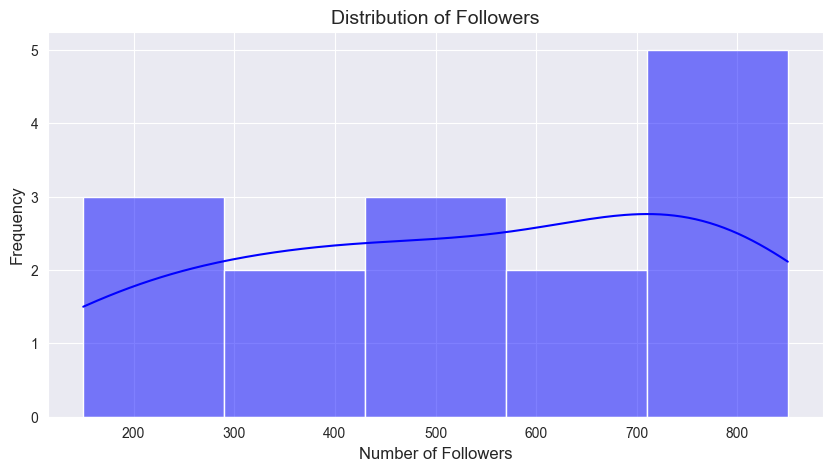

-0.2598121572745581


In [10]:
sns.set_style('darkgrid')
plt.figure(figsize=(10,5))
sns.histplot(data=data, x='Followers',bins=5, kde=True, color='blue')
plt.title('Distribution of Followers', fontsize=14)
plt.xlabel('Number of Followers', fontsize= 12)
plt.ylabel('Frequency', fontsize=12)

plt.show()

print(data["Followers"].skew())

 ## KDE (Kernel Density Estimation) Plot
A KDE plot is a smoothed version of a histogram that estimates the probability density function

of the data. It provides a continuous, smooth curve representing the data distribution.

/var/folders/p1/t96f4tgd04ldzft7345vdthw0000gn/T/ipykernel_88720/121668833.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data["Followers"],


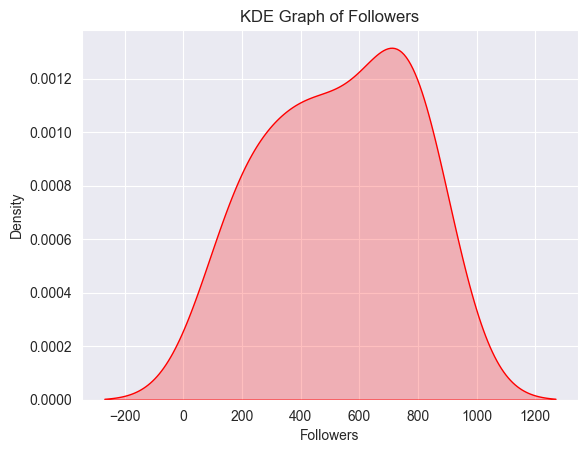

skew value : -0.2598121572745581


In [11]:
data.head()
# Ploting the KDE
sns.kdeplot(data["Followers"],
shade=True,
color="red")
plt.title("KDE Graph of Followers")
plt.show()
print(f"skew value : {data["Followers"].skew()}")

 # Categorical Plot
Seaborn provides several specialized plot types for visualizing categorical data. 

These plots help show the distribution or relationship of data across different categories

# 1. catplot() (General Categorical Plot)
Purpose: High-level interface for creating various categorical plots.
When to Use: When you want a unified way to generate different categorical plots (kind
parameter controls the type).

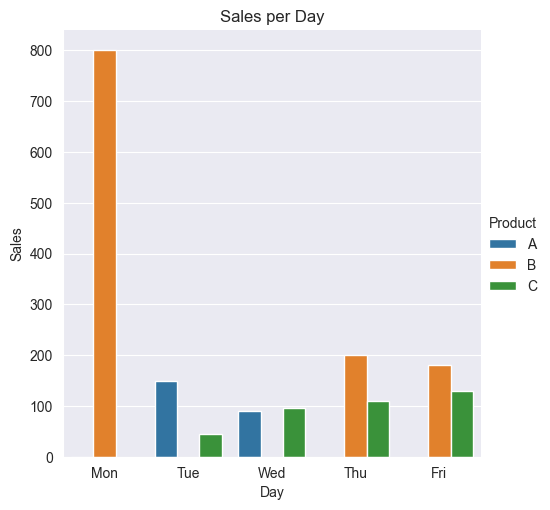

In [12]:
sales = pd.DataFrame({
"Day": ["Mon", "Tue", "Wed", "Thu", "Fri", "Mon", "Tue", "Wed","Thu", "Fri"],
"Product": ["A", "A", "A", "B", "B", "B", "C", "C", "C", "C"],
"Sales": [0, 150, 90, 200, 180, 800,45 , 95, 110, 130],
"Customer_Rating": [4.2, 0, 3.8, 4.7, 4.3, 4.6, 3.9, 10, 4.4,4.0],
"Discount": [5, 10, 0, 15, 20, 10, 0, 5, 10, 50]})
sns.catplot(data=sales, x="Day", y="Sales",
kind="bar",
hue="Product")
plt.title("Sales per Day")
plt.xlabel("Day")
plt.ylabel("Sales")
plt.show()

# 2. barplot() (Bar Plot)
Purpose: Displays mean (or other estimator) of a numerical variable per category, with error
bars.
When to Use: Comparing aggregated values (e.g., average sales per month).

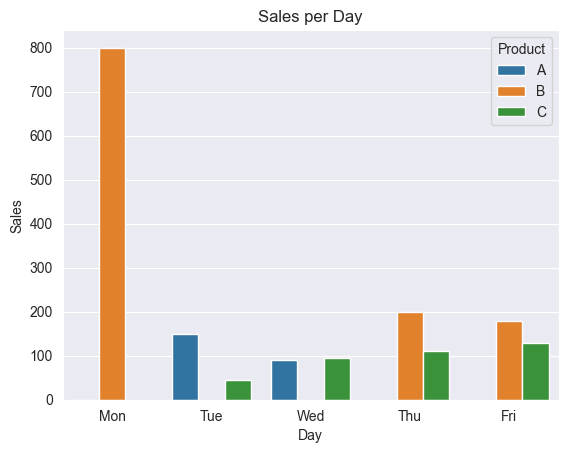

In [13]:
sns.barplot(data=sales, x="Day", y="Sales",hue="Product")
plt.title("Sales per Day")
plt.show()
# the confidence interval shows the uncertainty around the estimate of the mean.

# 3. boxplot() (Box Plot)
Purpose: Displays quartiles, median, and outliers of numerical data per category.
When to Use: Comparing distributions and detecting outliers (e.g., salary distribution by job
role).

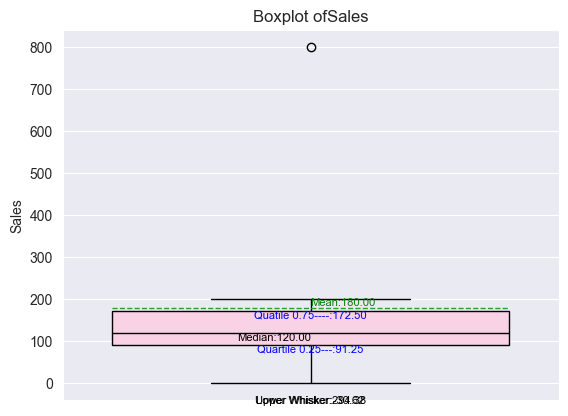

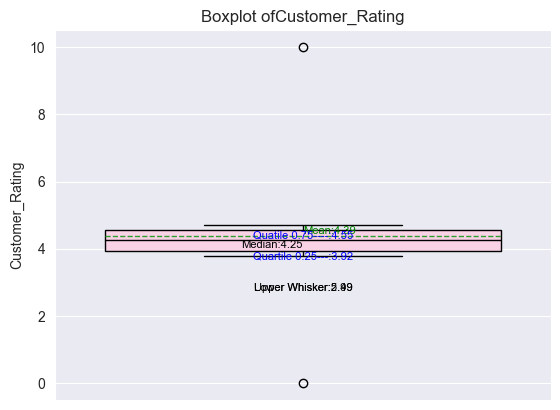

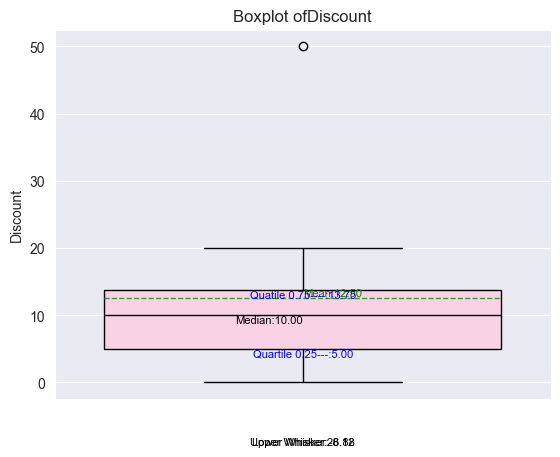

In [14]:
for i in sales.select_dtypes(include=["number"]).columns:
    sns.boxplot(data=sales,y=i,color="#ffcce6",
                showmeans=True,
                meanline=True,
                showcaps=True,
                showbox=True,
                showfliers=True,
                linewidth=1,
                linecolor="black")
    mean_value=sales[i].mean()
    median_value=sales[i].median()
    q1=sales[i].quantile(0.25)
    q3=sales[i].quantile(0.75)
    IQR=q3-q1
    plt.text(0,mean_value,
            f"Mean:{mean_value:.2f}",# 0 and 1 means the x and y axis values,
             ha='left',
             va='bottom',fontsize=8,color='Green')
    plt.text(0,median_value,
            f"Median:{median_value:.2f}",
             ha='right',
             va='top',fontsize=8,color='black')
    plt.text(0,q1,
            f"Quartile 0.25---:{q1:.2f}",
             ha="center",
             va='top',fontsize=8,color='blue')
    plt.text(0,q3,
            f"Quatile 0.75----:{q3:.2f}",
            ha='center',
            va='top',fontsize=8,color='blue')
    plt.text(0,q1-1.5*IQR,
            f"Lower Whisker:{q1-1.5*IQR:.2f}",
            ha='center',
            va='top',fontsize=8,color='black')
    plt.text(0,q1-1.5*IQR,
            f"Upper Whisker:{q3+1.5*IQR:.2f}",
            ha='center',
            va='top',fontsize=8,color='black')
    plt.title(f"Boxplot of{i}")
    plt.show()

# Matrix Plots and Regression Plots: Explanation and Uses
## 1. Matrix Plots
A matrix plot is a way to visualize relationships between multiple numerical variables in a
dataset. It displays scatter plots or other visual representations in a grid format, where each
subplot represents the relationship between two different variables.

### Types of Matrix Plots

• Scatterplot Matrix (Pair Plot): A grid of scatter plots showing relationships between
multiple numerical variables.
• Correlation Matrix Plot: A heatmap-like visualization of correlation coefficients between
variables.
• Faceted Matrix Plots: These can include histograms or boxplots alongside scatter plots
to show variable distributions.

### Uses of Matrix Plots
• Identifying relationships and dependencies between multiple variables.
• Detecting multicollinearity in regression analysis.
• Providing a quick overview of dataset structure before modeling.
• Useful in Exploratory Data Analysis (EDA).

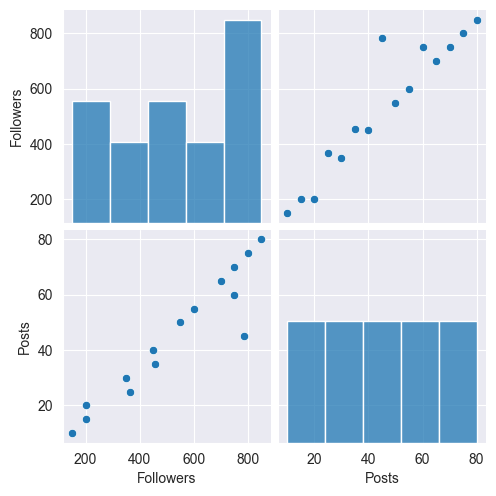

In [15]:
sns.pairplot(data)

## Correlation Matrix Plot (Heatmap)

Text(0.5, 1.0, 'Correlation Matrix Heatmap')

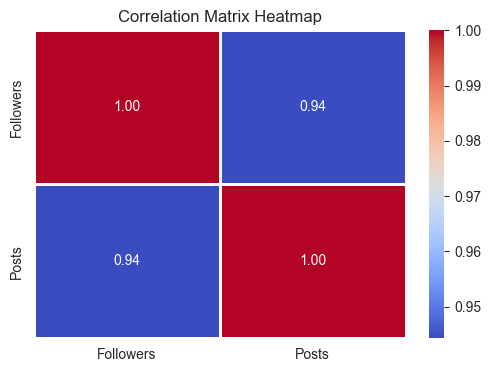

In [16]:
# Compute the correlation matrix
corr_matrix = data[['Followers','Posts']].corr()

plt.figure(figsize=(6,4))
sns.heatmap(corr_matrix,annot=
            True,cmap='coolwarm',fmt=".2f",linewidths=0.9)
plt.title("Correlation Matrix Heatmap")

# Network


In [17]:
import networkx as nx
G = nx.DiGraph()

G.add_nodes_from(["Alice","Bob","Charlie","Diana","Eve"])

G.add_edges_from([("Alice","Bob"),
                  ("Alice","Charlie"),
                  ("Bob","Diana",),
                  ("Charlie","Diana"),
                  ("Diana","Eve")])

Text(0.5, 1.0, 'Basic Social Network with Directed Edges')

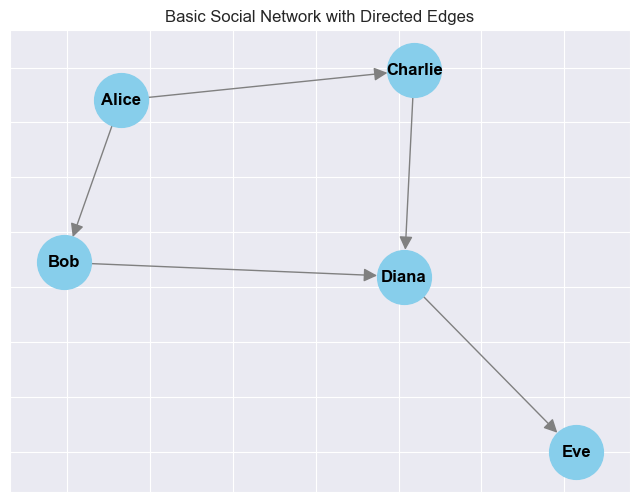

In [ ]:
plt.figure(figsize=(8,6))
pos = nx.spring_layout(G)  # Position nodes using the spring layout
nx.draw_networkx(G, pos, with_labels=True, node_color="skyblue", node_size= 1500,
                 font_size =12, font_weight= 'bold', edge_color = 'gray', arrows=True, arrowsize= 20)

plt.title("Basic Social Network with Directed Edges")

In [ ]:
# Create a sample DataFrame with 15 rows
social_media_data = pd.DataFrame({
    'Username': [f'user{i}' for i in range(1, 16)],
    'Followers': [np.random.randint(100, 10000) for _ in range(15)],
    'Posts': [np.random.randint(10, 500) for _ in range(15)],
    'Platform': np.random.choice(['Instagram', 'Twitter', 'Facebook', 'TikTok'], 15)
})

# Display the DataFrame
social_media_data


In [ ]:
sns.set_style('darkgrid')
plt.figure(figsize=(10,5))
sns.histplot(data=social_media_data,x='Followers',bins=5,kde=True,color='blue')


In [ ]:
from scipy.stats import skew  
followers_skewness = skew(social_media_data['Followers'])
posts_skewness = skew(social_media_data['Posts'])

print(f"Skewness of Followers: {followers_skewness:.2f}")
print(f"Skewness of Posts: {posts_skewness:.2f}")
